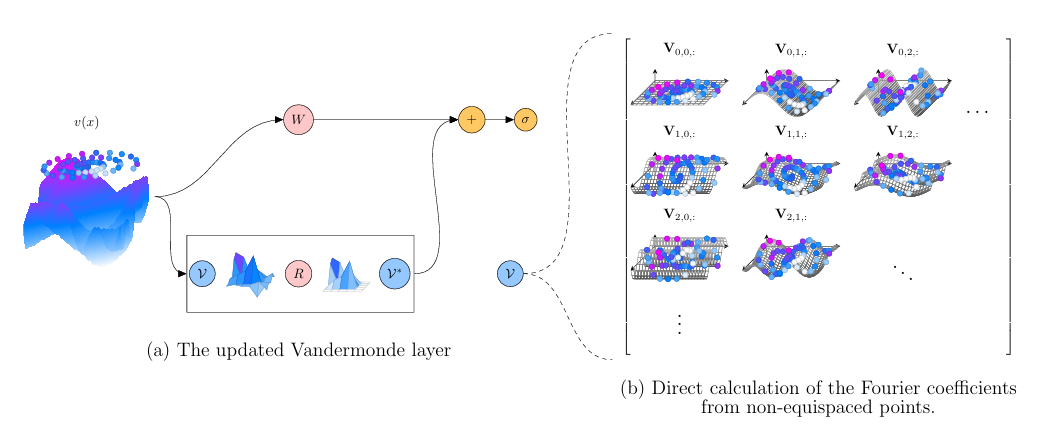

## Lower Branch ( Kernal Output )

In [ ]:
import numpy as np  # We'll use numpy just for its array/math functions (like exp, sin, pi)

# ---
# 0. SETUP: DEFINE PARAMETERS AND TOY DATA
# ---
# We'll use a tiny dataset to see every calculation.
n_points = 5  # n = 5 data points
m = 3         # m = 3 modes in each dimension
n_modes = m * m # Total modes = 3 * 3 = 9

print(f"--- 0. SETUP ---")
print(f"We have n = {n_points} data points scattered in 2D space.")
print(f"We want to find m*m = {n_modes} Fourier modes.\n")

# P is our list of point coordinates (x, y).
# [cite_start]These are the P_k in Equation (4) [cite: 114]
# Shape: (n_points, 2)
P = np.array([
    [0.1, 0.2],  # Point k=0
    [0.5, 0.5],  # Point k=1
    [0.8, 0.3],  # Point k=2
    [0.2, 0.9],  # Point k=3
    [0.7, 0.7]   # Point k=4
])

# v_t is our input data (a scalar value) at each point P_k.
# [cite_start]This is v_t(x) in Equation (8) [cite: 139]
# Shape: (n_points,)
v_t = np.array([1.5, -0.5, 1.0, 0.0, -1.2])

print(f"Point Coordinates P (shape {P.shape}):")
for k in range(n_points):
    print(f"  k={k}: (x={P[k, 0]}, y={P[k, 1]})")

print(f"\nInput Data v_t (shape {v_t.shape}):")
for k in range(n_points):
    print(f"  v_t at point k={k}: {v_t[k]}")
print("-" * 40 + "\n")

--- 0. SETUP ---
We have n = 5 data points scattered in 2D space.
We want to find m*m = 9 Fourier modes.

Point Coordinates P (shape (5, 2)):
  k=0: (x=0.1, y=0.2)
  k=1: (x=0.5, y=0.5)
  k=2: (x=0.8, y=0.3)
  k=3: (x=0.2, y=0.9)
  k=4: (x=0.7, y=0.7)

Input Data v_t (shape (5,)):
  v_t at point k=0: 1.5
  v_t at point k=1: -0.5
  v_t at point k=2: 1.0
  v_t at point k=3: 0.0
  v_t at point k=4: -1.2
----------------------------------------



In [ ]:
# ---
# 1. BUILD THE VANDERMONDE MATRIX (V) FROM SCRATCH
# ---
# This matrix, V, maps data from 'point space' to 'Fourier space'.
# [cite_start]It is built using Equation (4) [cite: 114, 115]
# V_j,k = sqrt(2/n) * exp(-i * (j0*P_k,0 + j1*P_k,1))
# It will have shape (n_modes, n_points) -> (9, 5)

print(f"--- 1. BUILDING VANDERMONDE MATRIX V (Shape {n_modes}x{n_points}) ---")

# Create a list of all mode pairs (j0, j1) from (0,0) to (2,2)
mode_pairs = []
for j0 in range(m):
    for j1 in range(m):
        mode_pairs.append((j0, j1))
# mode_pairs = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1), (2,2)]

# Initialize an empty complex-valued matrix
V = np.zeros((n_modes, n_points), dtype=complex)

# Loop over each row 'j' (each mode)
for j in range(n_modes):
    j0, j1 = mode_pairs[j]  # Get the (j0, j1) for this mode

    print(f"\n  Calculating Row j={j} (for mode j0={j0}, j1={j1}):")

    # Loop over each column 'k' (each data point)
    for k in range(n_points):
        P_k_0 = P[k, 0]  # x-coordinate of point k
        P_k_1 = P[k, 1]  # y-coordinate of point k

        # This is the exponent term in Eq (4): (j0*P_k,0 + j1*P_k,1)
        exponent_val = (j0 * P_k_0) + (j1 * P_k_1)

        # This is the e^(-i * exponent)
        complex_exponential = np.exp(-1j * exponent_val)

        # Set the value in the matrix V[j, k]
        # We'll apply the normalization sqrt(2/n) at the very end
        V[j, k] = complex_exponential

        print(f"    V[{j},{k}] = exp(-i * ({j0}*{P_k_0} + {j1}*{P_k_1}))")
        print(f"         = exp(-i * {exponent_val:.2f}) = {complex_exponential:.2f}")

# [cite_start]Now, apply the normalization constant from Eq (4) to the whole matrix [cite: 115]
normalization = np.sqrt(2.0 / n_points)
V = V * normalization

print(f"\nFinal Vandermonde Matrix V (normalized by sqrt(2/{n_points})={normalization:.2f}):")
print(np.round(V, 2))
print("-" * 40 + "\n")

--- 1. BUILDING VANDERMONDE MATRIX V (Shape 9x5) ---

  Calculating Row j=0 (for mode j0=0, j1=0):
    V[0,0] = exp(-i * (0*0.1 + 0*0.2))
         = exp(-i * 0.00) = 1.00-0.00j
    V[0,1] = exp(-i * (0*0.5 + 0*0.5))
         = exp(-i * 0.00) = 1.00-0.00j
    V[0,2] = exp(-i * (0*0.8 + 0*0.3))
         = exp(-i * 0.00) = 1.00-0.00j
    V[0,3] = exp(-i * (0*0.2 + 0*0.9))
         = exp(-i * 0.00) = 1.00-0.00j
    V[0,4] = exp(-i * (0*0.7 + 0*0.7))
         = exp(-i * 0.00) = 1.00-0.00j

  Calculating Row j=1 (for mode j0=0, j1=1):
    V[1,0] = exp(-i * (0*0.1 + 1*0.2))
         = exp(-i * 0.20) = 0.98-0.20j
    V[1,1] = exp(-i * (0*0.5 + 1*0.5))
         = exp(-i * 0.50) = 0.88-0.48j
    V[1,2] = exp(-i * (0*0.8 + 1*0.3))
         = exp(-i * 0.30) = 0.96-0.30j
    V[1,3] = exp(-i * (0*0.2 + 1*0.9))
         = exp(-i * 0.90) = 0.62-0.78j
    V[1,4] = exp(-i * (0*0.7 + 1*0.7))
         = exp(-i * 0.70) = 0.76-0.64j

  Calculating Row j=2 (for mode j0=0, j1=2):
    V[2,0] = exp(-i * (0*0.1 

In [ ]:
# ---
# 2. PERFORM FORWARD TRANSFORM (v_f = V @ v_t)
# ---
# [cite_start]This is Step 1 of the kernel operation (Eq 10): V(v_t) [cite: 152]
# We are manually computing the matrix-vector product: v_f = V @ v_t
# This transforms our data from 'point space' (n_points,)
# to 'Fourier space' (n_modes,)
# v_f[j] = SUM_k ( V[j, k] * v_t[k] )

print(f"--- 2. FORWARD TRANSFORM (v_f = V @ v_t) ---")
print(f"Mapping {n_points} data points to {n_modes} Fourier coefficients...")

# Initialize an empty complex-valued vector for the Fourier coefficients
v_f = np.zeros((n_modes,), dtype=complex) # v_f is 'v in Fourier space'

# Loop over each mode 'j' to calculate its coefficient
for j in range(n_modes):
    j0, j1 = mode_pairs[j]

    # This will be the sum of (V[j,k] * v_t[k]) for all k
    sum_for_mode_j = 0 + 0j

    print(f"\n  Calculating coeff for mode j={j} (j0={j0}, j1={j1}):")
    print(f"    v_f[{j}] = SUM_k ( V[{j},k] * v_t[k] )")

    # Inner loop over all points 'k'
    for k in range(n_points):
        V_jk = V[j, k]
        v_k = v_t[k]
        product = V_jk * v_k
        print(f"      k={k}: ({V_jk:.2f}) * ({v_k:.2f}) = {product:.2f}")
        sum_for_mode_j += product

    v_f[j] = sum_for_mode_j
    print(f"    -> TOTAL v_f[{j}] = {sum_for_mode_j:.2f}")

print(f"\nFinal Fourier Coefficients v_f (shape {v_f.shape}):")
print(np.round(v_f, 2))
print("-" * 40 + "\n")

--- 2. FORWARD TRANSFORM (v_f = V @ v_t) ---
Mapping 5 data points to 9 Fourier coefficients...

  Calculating coeff for mode j=0 (j0=0, j1=0):
    v_f[0] = SUM_k ( V[0,k] * v_t[k] )
      k=0: (0.63+0.00j) * (1.50) = 0.95+0.00j
      k=1: (0.63+0.00j) * (-0.50) = -0.32+0.00j
      k=2: (0.63+0.00j) * (1.00) = 0.63+0.00j
      k=3: (0.63+0.00j) * (0.00) = 0.00+0.00j
      k=4: (0.63+0.00j) * (-1.20) = -0.76+0.00j
    -> TOTAL v_f[0] = 0.51+0.00j

  Calculating coeff for mode j=1 (j0=0, j1=1):
    v_f[1] = SUM_k ( V[1,k] * v_t[k] )
      k=0: (0.62-0.13j) * (1.50) = 0.93-0.19j
      k=1: (0.56-0.30j) * (-0.50) = -0.28+0.15j
      k=2: (0.60-0.19j) * (1.00) = 0.60-0.19j
      k=3: (0.39-0.50j) * (0.00) = 0.00+0.00j
      k=4: (0.48-0.41j) * (-1.20) = -0.58+0.49j
    -> TOTAL v_f[1] = 0.68+0.27j

  Calculating coeff for mode j=2 (j0=0, j1=2):
    v_f[2] = SUM_k ( V[2,k] * v_t[k] )
      k=0: (0.58-0.25j) * (1.50) = 0.87-0.37j
      k=1: (0.34-0.53j) * (-0.50) = -0.17+0.27j
      k=2: (0.5

In [ ]:
# ---
# 3. FILTER IN FOURIER SPACE (v_f_filtered = R_phi @ v_f)
# ---
# [cite_start]This is Step 2 of the kernel operation (Eq 10): R_phi * (V(v_t)) [cite: 152]
# R_phi is the LEARNABLE part. In a real FNO/VNO, this is a
# small matrix that mixes and weights the modes.
#
# To keep it simple, we'll simulate R_phi as a simple
# "low-pass filter" that KILLS (sets to zero) the high-frequency modes.
# We'll keep the first 5 modes and kill the last 4.

print(f"--- 3. FILTERING IN FOURIER SPACE ---")
print(f"Simulating a learnable filter R_phi by zeroing-out high-freq modes.")
print(f"Original v_f: \n{np.round(v_f, 2)}")

v_f_filtered = np.copy(v_f)
modes_to_kill = [5, 6, 7, 8] # Kill the highest-freq modes

for j in modes_to_kill:
    j0, j1 = mode_pairs[j]
    print(f"  Killing mode j={j} (j0={j0}, j1={j1})")
    v_f_filtered[j] = 0 + 0j

print(f"\nFiltered v_f_filtered (shape {v_f_filtered.shape}):")
print(np.round(v_f_filtered, 2))
print("-" * 40 + "\n")

--- 3. FILTERING IN FOURIER SPACE ---
Simulating a learnable filter R_phi by zeroing-out high-freq modes.
Original v_f: 
[0.51+0.j   0.68+0.27j 1.1 +0.29j 0.53+0.09j 0.89+0.17j 1.3 -0.11j
 0.61+0.19j 1.03+0.j   1.26-0.51j]
  Killing mode j=5 (j0=1, j1=2)
  Killing mode j=6 (j0=2, j1=0)
  Killing mode j=7 (j0=2, j1=1)
  Killing mode j=8 (j0=2, j1=2)

Filtered v_f_filtered (shape (9,)):
[0.51+0.j   0.68+0.27j 1.1 +0.29j 0.53+0.09j 0.89+0.17j 0.  +0.j
 0.  +0.j   0.  +0.j   0.  +0.j  ]
----------------------------------------



In [ ]:
# ---
# 4. BUILD THE ADJOINT MATRIX (V*)
# ---
# This is the "Backward Transform" matrix.
# [cite_start]It is the conjugate transpose of V[cite: 133, 134].
# V_adjoint[k, j] = conjugate(V[j, k])
# It will have shape (n_points, n_modes) -> (5, 9)

print(f"--- 4. BUILDING ADJOINT MATRIX V* (Shape {n_points}x{n_modes}) ---")
print(f"This matrix maps from 'Fourier space' back to 'point space'.")

# Initialize an empty complex-valued matrix
V_adjoint = np.zeros((n_points, n_modes), dtype=complex)

# Loop over rows 'k' (points)
for k in range(n_points):
    # Loop over columns 'j' (modes)
    for j in range(n_modes):
        # Transpose and conjugate
        V_adjoint[k, j] = V[j, k].conj()

print(f"\nFinal Adjoint Matrix V* (Conjugate Transpose of V):")
print(np.round(V_adjoint, 2))
print("-" * 40 + "\n")

--- 4. BUILDING ADJOINT MATRIX V* (Shape 5x9) ---
This matrix maps from 'Fourier space' back to 'point space'.

Final Adjoint Matrix V* (Conjugate Transpose of V):
[[ 0.63-0.j    0.62+0.13j  0.58+0.25j  0.63+0.06j  0.6 +0.19j  0.56+0.3j
   0.62+0.13j  0.58+0.25j  0.52+0.36j]
 [ 0.63-0.j    0.56+0.3j   0.34+0.53j  0.56+0.3j   0.34+0.53j  0.04+0.63j
   0.34+0.53j  0.04+0.63j -0.26+0.58j]
 [ 0.63-0.j    0.6 +0.19j  0.52+0.36j  0.44+0.45j  0.29+0.56j  0.11+0.62j
  -0.02+0.63j -0.2 +0.6j  -0.37+0.51j]
 [ 0.63-0.j    0.39+0.5j  -0.14+0.62j  0.62+0.13j  0.29+0.56j -0.26+0.58j
   0.58+0.25j  0.17+0.61j -0.37+0.51j]
 [ 0.63-0.j    0.48+0.41j  0.11+0.62j  0.48+0.41j  0.11+0.62j -0.32+0.55j
   0.11+0.62j -0.32+0.55j -0.6 +0.21j]]
----------------------------------------



In [ ]:
# ---
# 5. PERFORM BACKWARD TRANSFORM (v_t_new = V* @ v_f_filtered)
# ---
# [cite_start]This is Step 3 of the kernel operation (Eq 10): V* ( ... ) [cite: 152]
# We are manually computing the matrix-vector product:
# v_t_new[k] = SUM_j ( V_adjoint[k, j] * v_f_filtered[j] )
#
# This transforms our data from 'Fourier space' (n_modes,)
# back to 'point space' (n_points,)

print(f"--- 5. BACKWARD TRANSFORM (v_t_new = V* @ v_f_filtered) ---")
print(f"Mapping {n_modes} filtered coefficients back to {n_points} data points...")

# Initialize an empty complex-valued vector for the new point data
v_t_new = np.zeros((n_points,), dtype=complex)

# Loop over each point 'k' to calculate its new value
for k in range(n_points):

    # This will be the sum of (V*[k,j] * v_f_filtered[j]) for all j
    sum_for_point_k = 0 + 0j

    print(f"\n  Calculating value for point k={k}:")
    print(f"    v_t_new[{k}] = SUM_j ( V*[{k},j] * v_f_filtered[j] )")

    # Inner loop over all modes 'j'
    for j in range(n_modes):
        V_kj_adj = V_adjoint[k, j]
        v_f_filt_j = v_f_filtered[j]

        product = V_kj_adj * v_f_filt_j

        # We only print non-zero products to avoid clutter
        if v_f_filt_j != 0:
             print(f"      j={j}: ({V_kj_adj:.2f}) * ({v_f_filt_j:.2f}) = {product:.2f}")

        sum_for_point_k += product

    v_t_new[k] = sum_for_point_k
    print(f"    -> TOTAL v_t_new[{k}] = {sum_for_point_k:.2f}")

print(f"\nFinal (complex) output v_t_new (shape {v_t_new.shape}):")
print(np.round(v_t_new, 2))
print("-" * 40 + "\n")

--- 5. BACKWARD TRANSFORM (v_t_new = V* @ v_f_filtered) ---
Mapping 9 filtered coefficients back to 5 data points...

  Calculating value for point k=0:
    v_t_new[0] = SUM_j ( V*[0,j] * v_f_filtered[j] )
      j=0: (0.63-0.00j) * (0.51+0.00j) = 0.32+0.00j
      j=1: (0.62+0.13j) * (0.68+0.27j) = 0.39+0.25j
      j=2: (0.58+0.25j) * (1.10+0.29j) = 0.57+0.44j
      j=3: (0.63+0.06j) * (0.53+0.09j) = 0.33+0.09j
      j=4: (0.60+0.19j) * (0.89+0.17j) = 0.51+0.27j
    -> TOTAL v_t_new[0] = 2.11+1.05j

  Calculating value for point k=1:
    v_t_new[1] = SUM_j ( V*[1,j] * v_f_filtered[j] )
      j=0: (0.63-0.00j) * (0.51+0.00j) = 0.32+0.00j
      j=1: (0.56+0.30j) * (0.68+0.27j) = 0.29+0.35j
      j=2: (0.34+0.53j) * (1.10+0.29j) = 0.22+0.68j
      j=3: (0.56+0.30j) * (0.53+0.09j) = 0.26+0.21j
      j=4: (0.34+0.53j) * (0.89+0.17j) = 0.21+0.53j
    -> TOTAL v_t_new[1] = 1.32+1.78j

  Calculating value for point k=2:
    v_t_new[2] = SUM_j ( V*[2,j] * v_f_filtered[j] )
      j=0: (0.63-0.00j

In [ ]:
# ---
# 6. FINAL COMPARISON
# ---
# The output v_t_new is the result of the kernel operation (K(phi)v_t).
# In a full VNO, this would be added to a residual (Wv_t) and
# [cite_start]put through an activation function (sigma)[cite: 139].
#
# For now, let's just compare the real part of the new data
# with the original data.

print(f"--- 6. FINAL COMPARISON ---")
print("The 'filtering' in Fourier space has smoothed/changed the data.")

print("\n         Original v_t   |   Filtered Output v_t_new (Real Part)")
print("         -------------- | -----------------------------------")
for k in range(n_points):
    print(f"  k={k}:   {v_t[k]:>10.2f}   |   {v_t_new[k].real:>10.2f}")

print("\n\nPROCESS COMPLETE.")
print("We have manually:")
print("1. Built the Vandermonde matrix V from point coordinates.")
print("2. Mapped data v_t to Fourier space v_f (Forward Transform).")
print("3. Filtered the modes v_f -> v_f_filtered.")
print("4. Built the Adjoint matrix V*.")
print("5. Mapped filtered modes v_f_filtered back to point space v_t_new (Backward Transform).")

--- 6. FINAL COMPARISON ---
The 'filtering' in Fourier space has smoothed/changed the data.

         Original v_t   |   Filtered Output v_t_new (Real Part)
         -------------- | -----------------------------------
  k=0:         1.50   |         2.11
  k=1:        -0.50   |         1.32
  k=2:         1.00   |         1.50
  k=3:         0.00   |         0.60
  k=4:        -1.20   |         0.68


PROCESS COMPLETE.
We have manually:
1. Built the Vandermonde matrix V from point coordinates.
2. Mapped data v_t to Fourier space v_f (Forward Transform).
3. Filtered the modes v_f -> v_f_filtered.
4. Built the Adjoint matrix V*.
5. Mapped filtered modes v_f_filtered back to point space v_t_new (Backward Transform).


## Upper Branch ( Residual connections )

In [ ]:
import numpy as np

# ---
# (Steps 0-5 from previous script)
# ...
# At this point, we have:
# v_t = np.array([1.5, -0.5, 1.0, 0.0, -1.2])
# v_t_new = np.array([2.11021+0.j, 1.32338+0.j, 1.50348+0.j, 0.60253+0.j, 0.68037+0.j])
# ---

# We'll re-define the key variables for this script continuation
v_t = np.array([1.5, -0.5, 1.0, 0.0, -1.2])
v_t_new = np.array([2.11021 + 0.j, 1.32338 + 0.j, 1.50348 + 0.j, 0.60253 + 0.j, 0.68037 + 0.j])

# The output of the kernel operation is typically real-valued after the
# backward transform, so we'll just take the real part.
kernel_output = v_t_new.real

print(f"--- CONTINUING SCRIPT ---")
print(f"Original Data v_t:")
print(v_t)
print(f"\nKernel Output (K(phi)v_t) (i.e., v_t_new.real):")
print(np.round(kernel_output, 2))
print("-" * 40 + "\n")

--- CONTINUING SCRIPT ---
Original Data v_t:
[ 1.5 -0.5  1.   0.  -1.2]

Kernel Output (K(phi)v_t) (i.e., v_t_new.real):
[2.11 1.32 1.5  0.6  0.68]
----------------------------------------



In [ ]:
# ---
# 7. IMPLEMENT THE RESIDUAL CONNECTION (Wv_t)
# ---
# This is the "upper branch" in the diagram.
# 'W' is a learnable transformation, just like 'R_phi' was.
# In the simplest case (where input/output channels are 1),
# 'W' can be a simple scalar weight that multiplies the input.
#
# Let's *simulate* this learnable weight by picking a toy value.
# Let's say W = 1.1 (the model learned this value)

W_weight = 1.1

print(f"--- 7. RESIDUAL CONNECTION (Wv_t) ---")
print(f"Simulating the learnable residual weight W = {W_weight}")

# Initialize an empty vector for the residual
residual_output = np.zeros((n_points,))

print(f"Calculating Residual Wv_t = {W_weight} * v_t")
for k in range(n_points):
    v_k = v_t[k]
    Wv_k = W_weight * v_k
    residual_output[k] = Wv_k
    print(f"  k={k}: {W_weight} * {v_k:.2f} = {Wv_k:.2f}")

print(f"\nFinal Residual Output (Wv_t):")
print(np.round(residual_output, 2))
print("-" * 40 + "\n")

--- 7. RESIDUAL CONNECTION (Wv_t) ---
Simulating the learnable residual weight W = 1.1
Calculating Residual Wv_t = 1.1 * v_t
  k=0: 1.1 * 1.50 = 1.65
  k=1: 1.1 * -0.50 = -0.55
  k=2: 1.1 * 1.00 = 1.10
  k=3: 1.1 * 0.00 = 0.00
  k=4: 1.1 * -1.20 = -1.32

Final Residual Output (Wv_t):
[ 1.65 -0.55  1.1   0.   -1.32]
----------------------------------------



In [ ]:
# ---
# 8. ADD THE KERNEL AND RESIDUAL
# ---
# This is the '+' circle in the diagram.
# We are adding the two branches: (Wv_t) + (K(phi)v_t)

print(f"--- 8. ADDING THE TWO BRANCHES ---")
print(f"Calculating: (Wv_t) + (K(phi)v_t)")

# Initialize an empty vector for the sum
pre_activation = np.zeros((n_points,))

for k in range(n_points):
    Wv_k = residual_output[k]
    Kv_k = kernel_output[k]
    sum_k = Wv_k + Kv_k
    pre_activation[k] = sum_k
    print(f"  k={k}: {Wv_k:.2f} (from W) + {Kv_k:.2f} (from K) = {sum_k:.2f}")

print(f"\nFinal Pre-Activation Vector:")
print(np.round(pre_activation, 2))
print("-" * 40 + "\n")

--- 8. ADDING THE TWO BRANCHES ---
Calculating: (Wv_t) + (K(phi)v_t)
  k=0: 1.65 (from W) + 2.11 (from K) = 3.76
  k=1: -0.55 (from W) + 1.32 (from K) = 0.77
  k=2: 1.10 (from W) + 1.50 (from K) = 2.60
  k=3: 0.00 (from W) + 0.60 (from K) = 0.60
  k=4: -1.32 (from W) + 0.68 (from K) = -0.64

Final Pre-Activation Vector:
[ 3.76  0.77  2.6   0.6  -0.64]
----------------------------------------



In [ ]:
# ---
# 9. APPLY THE ACTIVATION FUNCTION (sigma)
# ---
# This is the final step, sigma, which makes the model nonlinear.
# We'll use the most common activation function: ReLU (Rectified Linear Unit)
# ReLU(x) = max(0, x)
# It simply clips all negative values to 0.

print(f"--- 9. APPLYING ACTIVATION (sigma) ---")
print(f"Using ReLU(x) = max(0, x) as our sigma function.")

# This is our final prediction for v at time t+1
v_t_plus_1 = np.zeros((n_points,))

print(f"Calculating: v_t_plus_1 = ReLU( pre_activation )")
for k in range(n_points):
    x = pre_activation[k]
    relu_x = max(0, x)  # This is the ReLU function
    v_t_plus_1[k] = relu_x
    print(f"  k={k}: ReLU({x:.2f}) = {relu_x:.2f}")

print(f"\nFinal Prediction v_t_plus_1:")
print(np.round(v_t_plus_1, 2))
print("-" * 40 + "\n")

--- 9. APPLYING ACTIVATION (sigma) ---
Using ReLU(x) = max(0, x) as our sigma function.
Calculating: v_t_plus_1 = ReLU( pre_activation )
  k=0: ReLU(3.76) = 3.76
  k=1: ReLU(0.77) = 0.77
  k=2: ReLU(2.60) = 2.60
  k=3: ReLU(0.60) = 0.60
  k=4: ReLU(-0.64) = 0.00

Final Prediction v_t_plus_1:
[3.76 0.77 2.6  0.6  0.  ]
----------------------------------------



In [ ]:
# ---
# 10. FINAL PREDICTION SUMMARY
# ---

print(f"--- 10. FINAL PREDICTION SUMMARY ---")
print("We have successfully predicted the state at time t+1.")

print("\n         Original v_t   |   Final Prediction v_t+1")
print("         -------------- | --------------------------")
for k in range(n_points):
    print(f"  k={k}:   {v_t[k]:>10.2f}   |   {v_t_plus_1[k]:>10.2f}")

--- 10. FINAL PREDICTION SUMMARY ---
We have successfully predicted the state at time t+1.

         Original v_t   |   Final Prediction v_t+1
         -------------- | --------------------------
  k=0:         1.50   |         3.76
  k=1:        -0.50   |         0.77
  k=2:         1.00   |         2.60
  k=3:         0.00   |         0.60
  k=4:        -1.20   |         0.00


## Re-Implimentation using standard Libraries

In [ ]:
import torch

# --- 0. SETUP: DEFINE PARAMETERS AND TOY DATA ---
n_points = 5
m = 3
n_modes = m * m
W_weight = 1.1  # Simulated residual weight
modes_to_kill = [5, 6, 7, 8] # Indices for simulated filter

# Use torch.tensor for all data
P = torch.tensor([
    [0.1, 0.2], [0.5, 0.5], [0.8, 0.3], [0.2, 0.9], [0.7, 0.7]
], dtype=torch.float32)

v_t = torch.tensor(
    [1.5, -0.5, 1.0, 0.0, -1.2], dtype=torch.float32
)

# --- 1. BUILD THE VANDERMONDE MATRIX (V) ---
# Create mode pairs (j0, j1) using torch functions
j0 = torch.arange(m, dtype=torch.float32).repeat_interleave(m)
j1 = torch.arange(m, dtype=torch.float32).repeat(m)

# Use broadcasting to build the exponent matrix (shape [9, 5])
exponent = j0[:, None] * P[None, :, 0] + j1[:, None] * P[None, :, 1]

# Build V using torch.exp and set dtype to complex
V = torch.exp(-1j * exponent.to(torch.complex64))
normalization = torch.sqrt(torch.tensor(2.0 / n_points))
V = V * normalization

# --- 2. PERFORM FORWARD TRANSFORM (v_f = V @ v_t) ---
# Use torch.matmul (@) to project to Fourier space
# Note: v_t must be cast to complex for the multiplication
v_f = V @ v_t.to(torch.complex64)

# --- 3. FILTER IN FOURIER SPACE (v_f_filtered = R_phi @ v_f) ---
# Simulate R_phi as a diagonal matrix that kills high modes
filter_diag = torch.ones(n_modes, dtype=torch.complex64)
filter_diag[modes_to_kill] = 0
R_phi = torch.diag(filter_diag)

v_f_filtered = R_phi @ v_f

# --- 4. GET THE ADJOINT MATRIX (V*) ---
# Use .conj() and .T (transpose)
V_adjoint = V.conj().T

# --- 5. PERFORM BACKWARD TRANSFORM (Get Kernel Output) ---
v_t_new_complex = V_adjoint @ v_f_filtered
kernel_output = v_t_new_complex.real # Take the real part

# --- 7. IMPLEMENT THE RESIDUAL CONNECTION (Wv_t) ---
# (Step 6 was printing)
residual_output = W_weight * v_t

# --- 8. ADD THE KERNEL AND RESIDUAL ---
pre_activation = kernel_output + residual_output

# --- 9. APPLY THE ACTIVATION FUNCTION (sigma) ---
# Use PyTorch's built-in ReLU
v_t_plus_1 = torch.relu(pre_activation)

# --- 10. FINAL PREDICTION SUMMARY ---
print("--- PyTorch Final Prediction Summary ---")
print("\n         Original v_t   |   Final Prediction v_t+1")
print("         -------------- | --------------------------")
for k in range(n_points):
    print(f"  k={k}:   {v_t[k]:>10.2f}   |   {v_t_plus_1[k]:>10.2f}")

--- PyTorch Final Prediction Summary ---

         Original v_t   |   Final Prediction v_t+1
         -------------- | --------------------------
  k=0:         1.50   |         3.76
  k=1:        -0.50   |         0.77
  k=2:         1.00   |         2.60
  k=3:         0.00   |         0.60
  k=4:        -1.20   |         0.00
